<a href="https://colab.research.google.com/github/khodozzz/portfolio/blob/main/2_Countries_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
countries_df = pd.read_csv('Country_Dataset.csv')
countries_df

,Country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [ ]:
X = countries_df.drop(columns=['Country']).values

In [ ]:
names = countries_df['Country']

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(X_scaled.T)

print(pca.explained_variance_ratio_, '->', sum(pca.explained_variance_ratio_))

[0.49347507 0.18184637 0.14685152] -> 0.82217295694246


In [ ]:
X_reduced = pca.components_.T

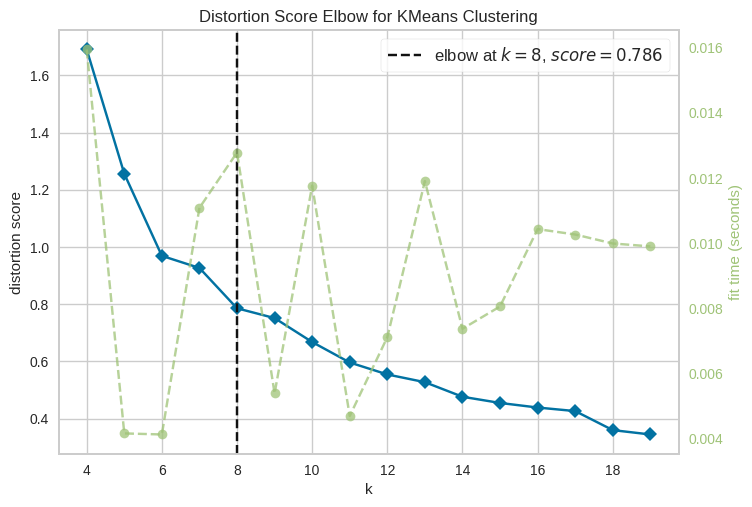

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

model = KMeans(n_init='auto')
visualizer = KElbowVisualizer(model, k=(4,20))

visualizer.fit(X_reduced)        
visualizer.show()  

In [ ]:
kmeans = KMeans(n_init='auto', n_clusters=visualizer.elbow_value_)
kmeans.fit(X_reduced)
labels = kmeans.labels_

In [ ]:
# kmeans = KMeans(n_clusters=10)
# kmeans.fit(X_scaled)
# labels = kmeans.labels_

In [ ]:
# kmeans = KMeans(n_clusters=7)
# kmeans.fit(X_reduced[:, :2])
# labels = kmeans.labels_

In [ ]:
import plotly.express as px

fig = px.scatter_3d(x=X_reduced[:, 0], y=X_reduced[:, 1], z=X_reduced[:, 2],
                    color=labels, hover_name=names)
fig.write_html('clusters.html')
fig.show()

In [ ]:
result = pd.DataFrame()
result['Country'] = names
result['Group'] = labels

In [ ]:
result.to_csv('result.csv')